In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

### Data Preprocessing:

In [3]:
df=pd.read_csv('market_basket_analysis.csv',header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


<Axes: xlabel='0'>

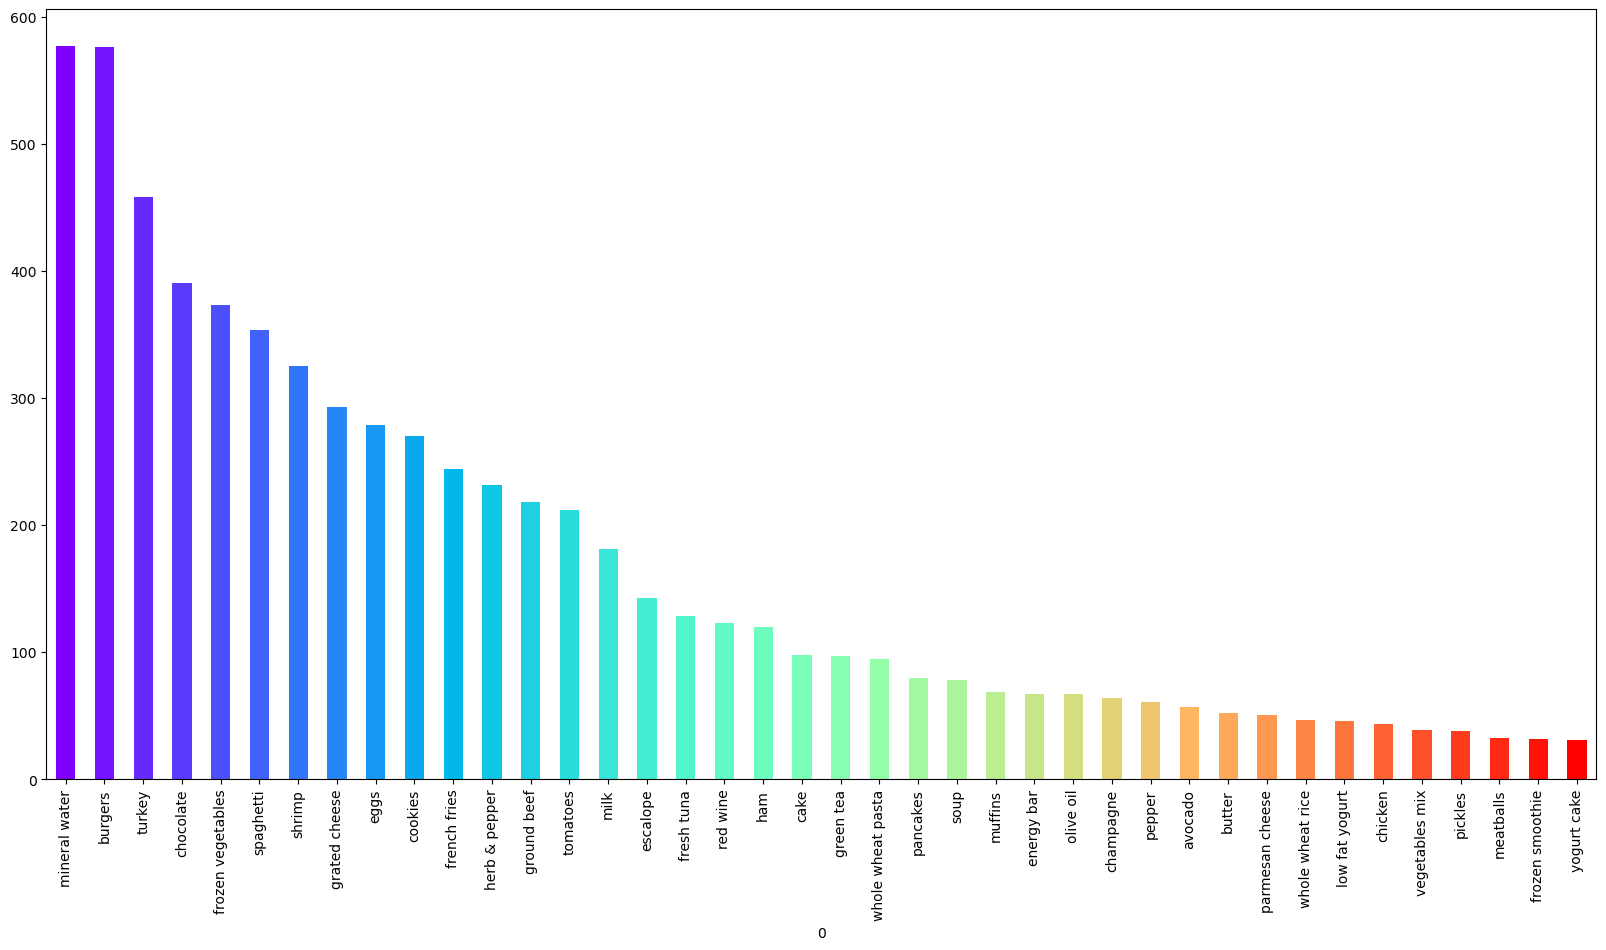

In [5]:
color=plt.cm.rainbow(np.linspace(0,1,40))
df[0].value_counts().head(40).plot.bar(figsize=(20,10),color=color)

In [6]:
trans=[]
for i in range(len(df)):
    trans.append([str(df.values[i,j]) for j in df.columns])

In [7]:
item1=[item for tra in trans for item in tra]

In [8]:
item2=list(set(item1))

In [9]:
sr=TransactionEncoder().fit(trans)
on_h=sr.transform(trans)

In [68]:
df1=pd.DataFrame(on_h,columns=sr.columns_).drop('nan',axis=1)

In [70]:
df1

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Association Rule Mining:

In [73]:
apriori=apriori(df1,min_support=0.01,use_colnames=True)

In [75]:
apriori

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, mineral water, ground beef)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(milk, spaghetti, mineral water)"
255,0.010265,"(olive oil, spaghetti, mineral water)"


In [77]:
association=association_rules(apriori,metric='confidence',min_threshold=0.01)

In [79]:
association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933,0.194767
...,...,...,...,...,...,...,...,...,...,...
427,"(pancakes, mineral water)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198,0.504819
428,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933,0.536902
429,(pancakes),"(spaghetti, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244,0.557862
430,(spaghetti),"(pancakes, mineral water)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385,0.590626


In [81]:
rules = association[(association['support'] >= 0.01) & 
              (association['confidence'] >= 0.5) & 
              (association['lift'] >= 1)]

In [103]:
rules.shape

(2, 10)

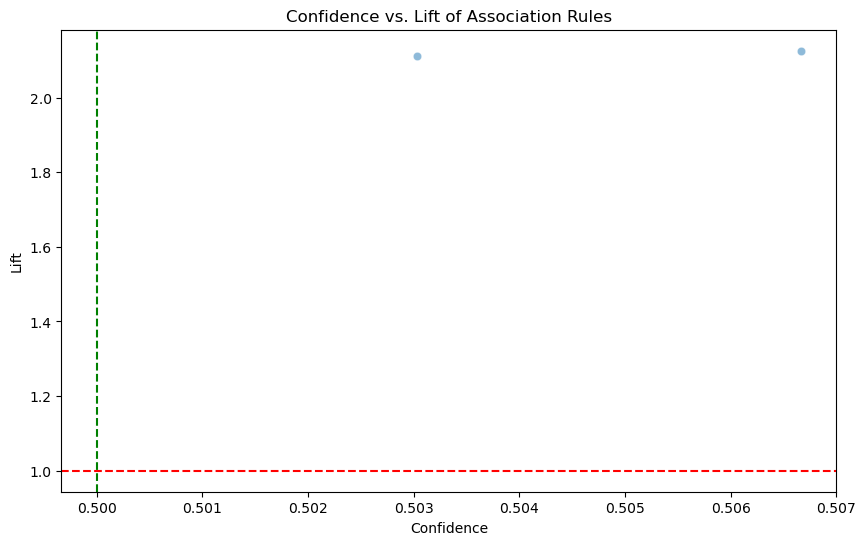

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', data=rules, alpha=0.5)
plt.title('Confidence vs. Lift of Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.axhline(1, color='red', linestyle='--')  # Reference line for lift
plt.axvline(0.5, color='green', linestyle='--')  # Reference line for confidence
plt.show()

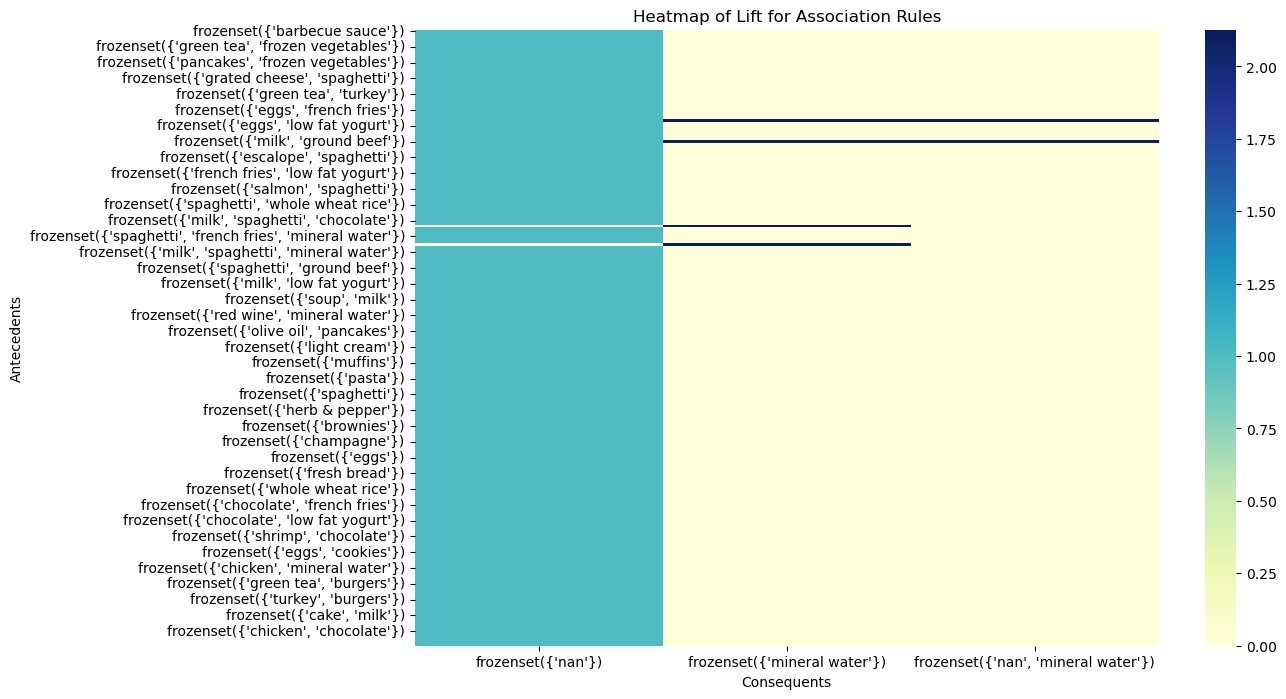

In [66]:
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='lift', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Lift for Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

C:\Users\SATEESH REDDY\AppData\Local\Temp\ipykernel_12772\2405387468.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')


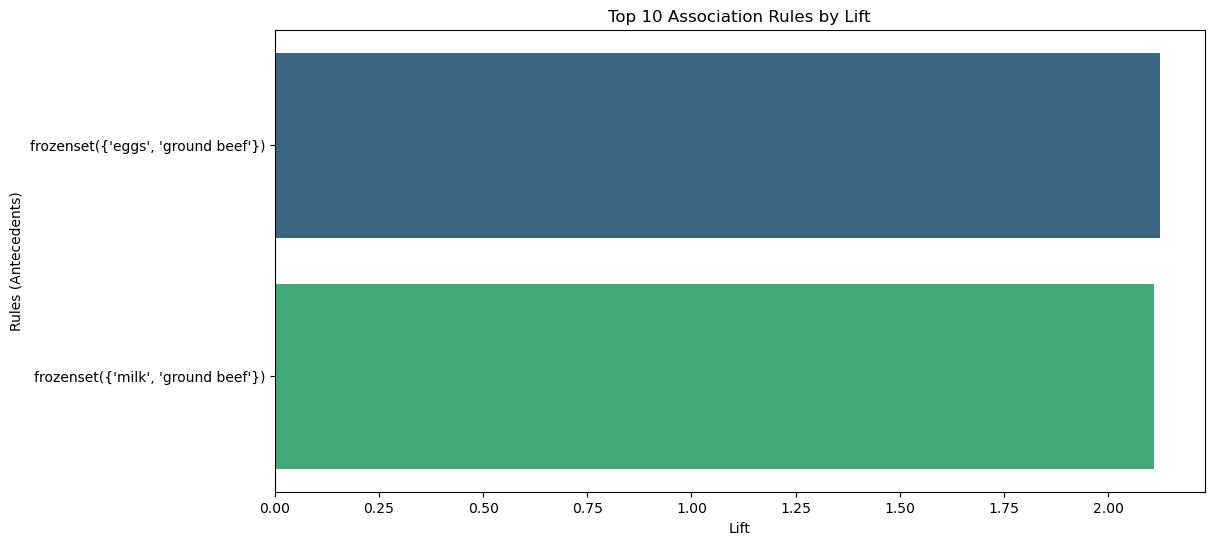

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
top_rules = rules.nlargest(10, 'lift')
plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y='antecedents', data=top_rules, palette='viridis')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules (Antecedents)')
plt.show()

#### Analysis and Interpretation:

In [20]:
### Analyzing the Generated Rules: Review the generated rules to identify which products are frequently purchased together. Look for patterns in product combinations.

In [21]:
print(rules.sort_values('lift', ascending=False).head(10))

                             antecedents           consequents  \
1664                 (eggs, ground beef)  (nan, mineral water)   
907                  (eggs, ground beef)       (mineral water)   
1657            (nan, eggs, ground beef)       (mineral water)   
1746                 (milk, ground beef)  (nan, mineral water)   
1273                 (milk, ground beef)       (mineral water)   
1741            (milk, nan, ground beef)       (mineral water)   
6                       (barbecue sauce)                 (nan)   
1136    (frozen vegetables, ground beef)                 (nan)   
1160  (mineral water, frozen vegetables)                 (nan)   
1153           (milk, frozen vegetables)                 (nan)   

      antecedent support  consequent support   support  confidence      lift  \
1664            0.019997            0.238235  0.010132    0.506667  2.126752   
907             0.019997            0.238368  0.010132    0.506667  2.125563   
1657            0.019997         

In [22]:
### Interpreting Results: Discuss the implications of the rules. For example, if "Milk" and "Bread" have a high lift, it suggests that customers who buy milk are likely to also buy bread. This insight can inform promotional strategies or product placements.

### Interview Questions:

In [24]:
## 1.	What is lift and why is it important in Association rules?

In [25]:
### Lift measures the strength of the association between two items. It compares the observed frequency of item pairs to the frequency expected if they were independent. 
### A lift greater than 1 indicates a positive correlation, suggesting that the presence of one item increases the likelihood of purchasing the other.

In [26]:
## 2.	What is support and Confidence. How do you calculate them?

In [27]:
## Support is the proportion of transactions that contain a particular itemset
## Confidence measures how often items in the rule appear together.

In [28]:
## 3.	What are some limitations or challenges of Association rules mining?

In [29]:
### High Dimensionality: Large datasets can produce many rules, making it difficult to interpret results.
## Threshold Sensitivity: The choice of support and confidence thresholds can greatly influence the output.
## Temporal Dynamics: Association rules may not account for changing consumer behavior over time.
#### Complexity of Relationships: Rules capture linear relationships, potentially overlooking complex interactions.